In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

## Params

In [2]:
num_clips = 5

In [74]:
# EPIC-KITCHEN and ActionNet

labels = {'EK':{
        0 : "take (get)",
        1 : "put-down (put/place)",
        2 : "open",
        3 : "close",
        4 : "wash (clean)",
        5 : "cut",
        6 : "stir (mix)",
        7 : "pour"
}, 'AN': {
        0 : "Spread",
        1 : "Get/Put",
        2 : "Clear",
        3 : "Slice",
        4 : "Clean",
        5 : "Pour",
        6 : "Load",
        7 : "Peel",
        8 : "Open/Close",
        9 : "Set",
        10 : "Stack",
        11 : "Unload"

}}

colors = {'EK': {
        0 : "#A52A2A",
        1 : "#DAA520",
        2 : "#FF7F50",
        3 : "#7BC8F6",
        4 : "#FFFF14",
        5 : "#76FF7B",
        6 : "#13EAC9",
        7 : "olive"
}, 'AN': {
        0 : "#A52A2A",
        1 : "#DAA520",
        2 : "#FF7F50",
        3 : "#7BC8F6",
        4 : "#FFFF14",
        5 : "#76FF7B",
        6 : "#13EAC9",
        7 : "olive",
        8 : "palegreen",
        9 : "lightpink",
        10 : "darkmagenta",
        11 : "cadetblue"
}}

In [70]:
data_augmented = pd.read_pickle('saved_features/ACTIONNET_EMG/EMG_augmented_clips_ActionNet_train.pkl')
data_original = pd.read_pickle('saved_features/ACTIONNET_EMG/EMG_no-clip_ActionNet_train.pkl')
data = pd.DataFrame(data_augmented['features'] + data_original['features'])

In [81]:
data = pd.DataFrame(pd.read_pickle("saved_features/reconstructed/VAE_0.001_2023-05-23 16_26_07.783372_train.pkl")["features"])

In [67]:
len(data)

526

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


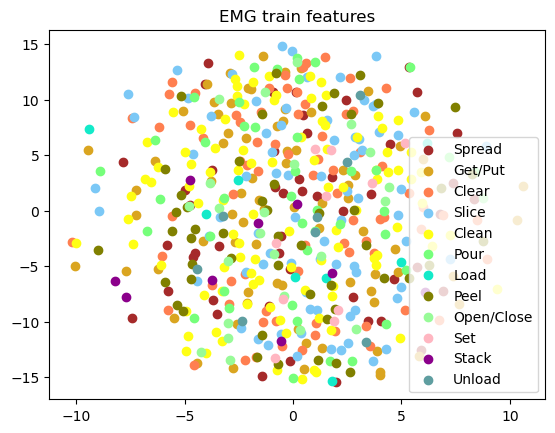

In [82]:
# plot emg features
features = [data.iloc[i].features_EMG[num_clips//2] for i in range(len(data))]
reduced = TSNE().fit_transform(features)
data['x'] = reduced[:, 0]
data['y'] = reduced[:, 1]
for i in range(12): # ek has 8 classes
    filtered = data[data["label"] == i]
    # compute the central frame
    plt.scatter(filtered['x'], filtered['y'], c=colors['AN'][i], label=labels['AN'][i])
plt.legend()
plt.title('EMG train features')
plt.show()


In [4]:

def plot_reconstructed(reconstructed_features, original_features, reduction = "tsne", model = "AE"):
    """
    Function to plot the reconstructed features and the original ones, using PCA or TSNE.
    - reconstructed_features: path to the reconstructed features
    - original_features: path to the original features
    - reduction: ["tsne", "pca"], reduction method to use
    - model: ["AE", "VAE"], model used to reconstruct the features
    """
    fig, ax = plt.subplots(2, figsize=(10, 10))

    data_original = pd.DataFrame(pd.read_pickle(original_features)['features'])
    annotations = pd.read_pickle("train_val/D1_train.pkl")
    data_original = pd.merge(data_original, annotations, how="inner", on="uid")
    features = data_original['features_RGB']    

    features = [f[num_clips//2] for f in features]
    for i in range(len(features)):
        if len(features[i]) != 1024:
            print(f"OPS, PROBLEMA: {len(features[i])}")
    reduced = None
    pca = None
    if reduction == "tsne":
        reduced = TSNE(n_components=2, random_state=0).fit_transform(features)
    else:
        pca = PCA().fit(features)
        reduced = pca.transform(features)
    data_original['x'] = reduced[:, 0]
    data_original['y'] = reduced[:, 1]
    for i in range(8): # ek has 8 classes
        filtered = data_original[data_original["verb_class"] == i]
        ax[0].scatter(filtered['x'], filtered['y'], c=colors['EK'][i], label=labels['EK'][i])
    ax[0].title.set_text('Original features')

    data_reconstructed = pd.DataFrame(pd.read_pickle(reconstructed_features)['features'])

    features = data_reconstructed['features_RGB']
    features = [f[num_clips//2] for f in features]
    print(f"Features size: {len(features)}")
    for i in range(len(features)):
        if len(features[i]) != 1024:
            print(f"OPS, PROBLEMA: {len(features[i])}")

    reduced = None
    pca = None
    if reduction == "tsne":
        reduced = TSNE(n_components=2, random_state=0).fit_transform(features)
    else:
        pca = PCA().fit(features)
        reduced = pca.transform(features)

    data_reconstructed['x'] = reduced[:, 0]
    data_reconstructed['y'] = reduced[:, 1]
    for i in range(8): # ek has 8 classes
        filtered = data_reconstructed[data_reconstructed["label"] == i]
        ax[1].scatter(filtered['x'], filtered['y'], c=colors['EK'][i], label=labels['EK'][i])
    ax[1].title.set_text('Reconstructed features')
    fig.suptitle(f"Feature reconstructed with {model}")
    fig.show()

## Playgroud

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Features size: 1543


/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


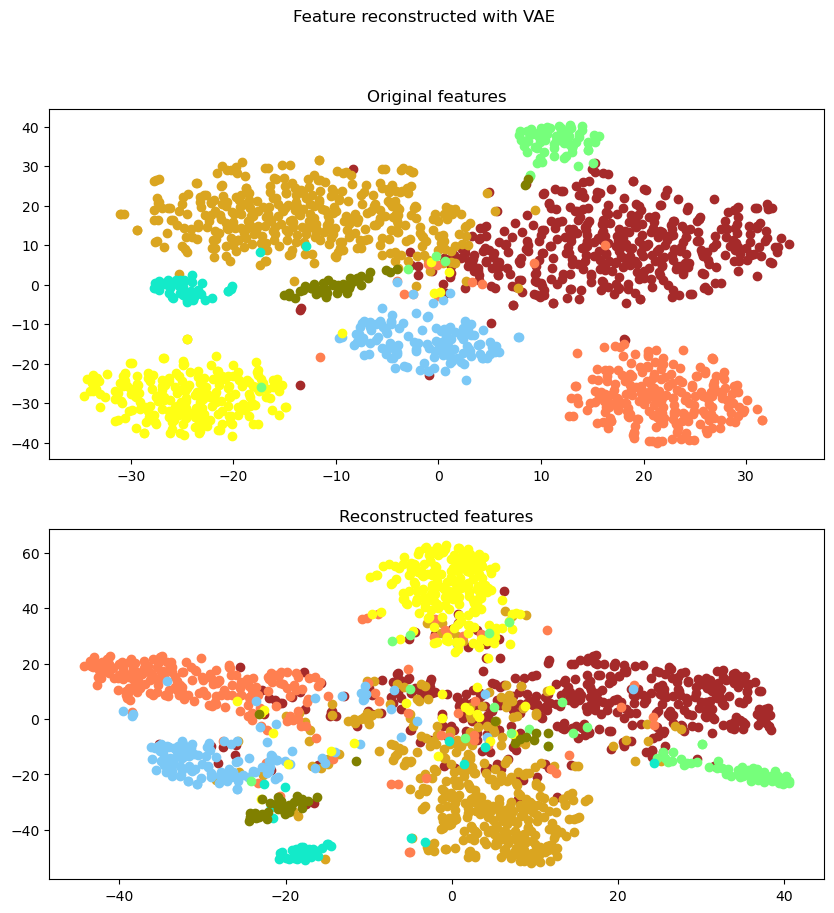

In [5]:
plot_reconstructed("saved_features/reconstructed/VAE_0.001_2023-05-17 20:32:03.209029_D1_train.pkl", "saved_features/EPIC/FT_D_D1_16f_5c_D1_train.pkl", reduction="tsne", model="VAE")

In [77]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# retrieve an img from a path
def getImage(path, zoom=0.05):
    return OffsetImage(plt.imread(path), zoom=zoom)

def visualize_features(title, filename, annotation, video_level=True, dataset='EK', save=True, modality="RGB"):
    """
    visualize the features
    - title: title of the plot
    - filename: path to the features
    - annotation: path to the annotation
    - video_level: if True, plot the central frame of the video
    - dataset: ['EK', 'AN'], dataset to use
    - save: if True, save the plot as a png image
    - modality: ['RGB', 'EMG'], modality to use
    """
    data = pd.DataFrame(pd.read_pickle(filename)['features'])
    annotations = pd.read_pickle(annotation)
    data = pd.merge(data, annotations, how="inner", on="uid") # TODO: for some features, the label is inside the dict, not in the annotations
    features = data[f'features_{modality}']
    if video_level:
        features = [f[num_clips//2] for f in features]
    
    reduced = TSNE().fit_transform(features)
    data['x'] = reduced[:, 0]
    data['y'] = reduced[:, 1]
    for i in range(len(labels[dataset])):
        filtered = data[data["verb_class"] == i]
        # compute the central frame
        plt.scatter(filtered['x'], filtered['y'], c=colors[dataset][i], label=labels[dataset][i])
    plt.legend()
    plt.title(title)
    #plt.savefig(f"img/{filename.split('/')[1]}.png")
    plt.show()

def visualize_features_img(title, pretrained="FT", frames=8, sampling="D"):
    data = pd.DataFrame(pd.read_pickle(f"saved_features/EPIC/{pretrained}_{sampling}_D1_{frames}f_5c_D1_test.pkl")['features'])
    annotations_test = pd.read_pickle("train_val/D1_test.pkl")
    data = pd.merge(data, annotations_test, how="inner", on="uid")

    features = data['features_RGB']
    features = [f[num_clips//2] for f in features]
    reduced = TSNE().fit_transform(features)

    data['x'] = reduced[:, 0]
    data['y'] = reduced[:, 1]

    fig, ax = plt.subplots()
    for i in range(8): # ek has 8 classes
        filtered = data[data["verb_class"] == i]
        ax.scatter(filtered['x'], filtered['y'], c=colors['EK'][i], label=labels['EK'][i])
        paths = [f"../ek_data/frames/{video_id}/img_{(stop + start)//2:010d}.jpg" for start, stop, video_id in zip(filtered['start_frame'], filtered['stop_frame'], filtered['video_id'])]
        for x0, y0, path in zip(filtered['x'], filtered['y'], paths):
            ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
            ax.add_artist(ab)
    plt.suptitle(title,fontsize=16)
    plt.title(f"{'Imagenet + Kinetics' if pretrained == 'PT' else 'Finetuned on P08(Epic Kitchen)'} - {frames} frames - {'Dense' if sampling == 'D' else 'Uniform'} sampling", fontsize=10)

    plt.savefig(f"img/features/with_central_frame/{pretrained}_{sampling}_{frames}f.pdf")
    plt.show()

def visualize_features_all(title, pretrained="FT", frames=8, sampling="D"):
    data_train = pd.DataFrame(pd.read_pickle(f"saved_features/EPIC/{pretrained}_{sampling}_D1_{frames}f_5c_D1_train.pkl")['features'])
    annotations_train = pd.read_pickle("train_val/D1_train.pkl")
    data_train = pd.merge(data_train, annotations_train, how="inner", on="uid")

    data_test = pd.DataFrame(pd.read_pickle(f"saved_features/EPIC/{pretrained}_{sampling}_D1_{frames}f_5c_D1_test.pkl")['features'])
    annotations_test = pd.read_pickle("train_val/D1_test.pkl")
    data_test = pd.merge(data_train, annotations_train, how="inner", on="uid")

    data = pd.concat([data_train, data_test])
    
    features = data['features_RGB']
    
    features = [f[num_clips//2] for f in features]
    reduced = TSNE().fit_transform(features)
    data['x'] = reduced[:, 0]
    data['y'] = reduced[:, 1]
    for i in range(8): # ek has 8 classes
        filtered = data[data["verb_class"] == i]
        plt.scatter(filtered['x'], filtered['y'], c=colors['EK'][i], label=labels['EK'][i])
    plt.suptitle(title,fontsize=16)
    plt.title(f"{'Imagenet + Kinetics' if pretrained == 'PT' else 'Finetuned on P08(Epic Kitchen)'} - {frames} frames - {'Dense' if sampling == 'D' else 'Uniform'} sampling", fontsize=10)
    plt.legend(loc="best")
    plt.savefig(f"img/features/class_correlation/{pretrained}_{sampling}_{frames}f.pdf")
    plt.show()


/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


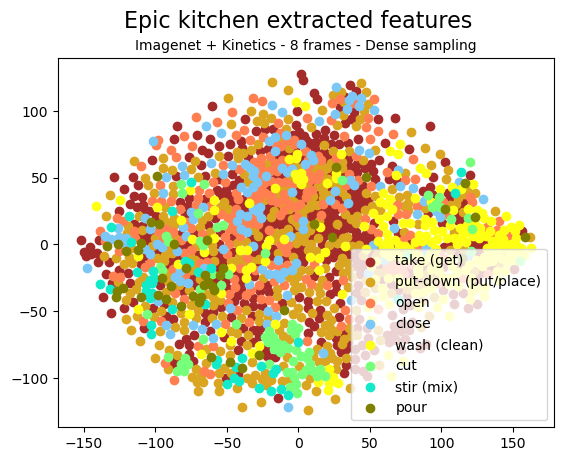

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


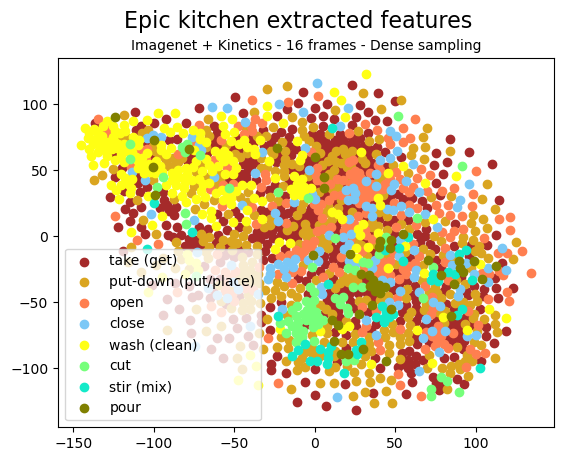

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


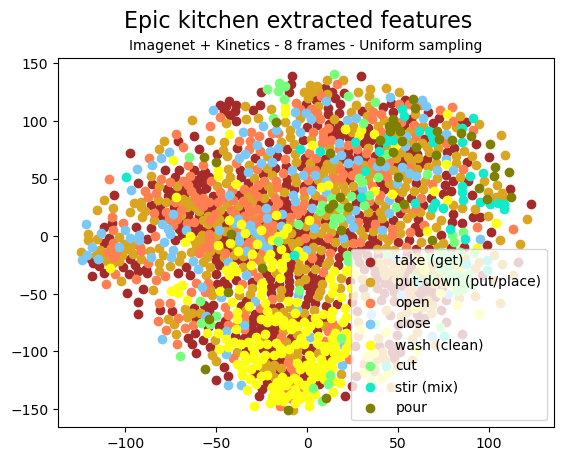

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


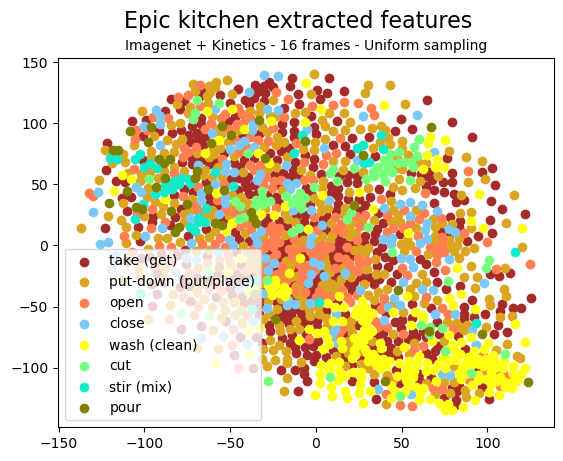

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


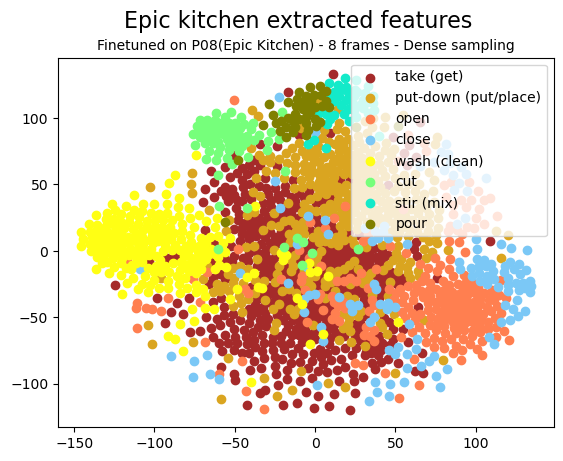

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


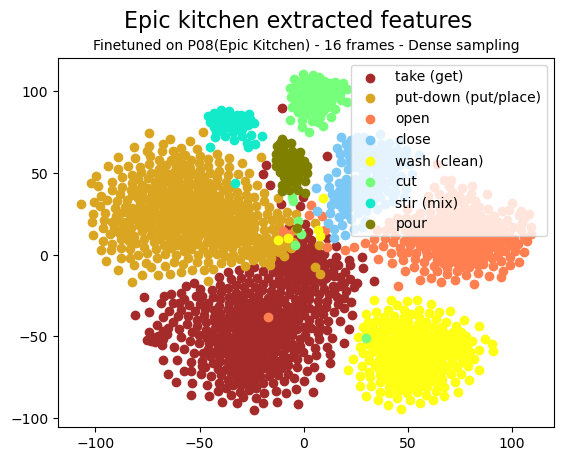

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


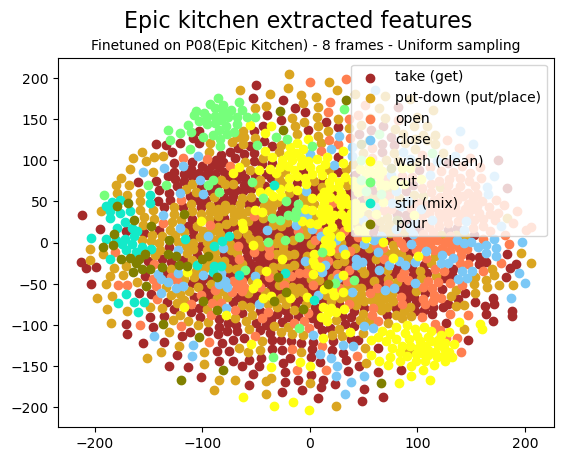

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


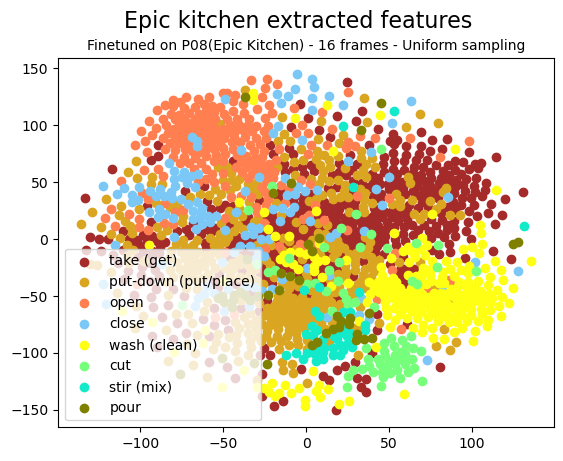

In [13]:
for pretrained in ["PT", "FT"]:
    for sampling in ["D", "U"]:
        for frames in [8, 16]:
            visualize_features_all("Epic kitchen extracted features", pretrained=pretrained, sampling=sampling, frames=frames)

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


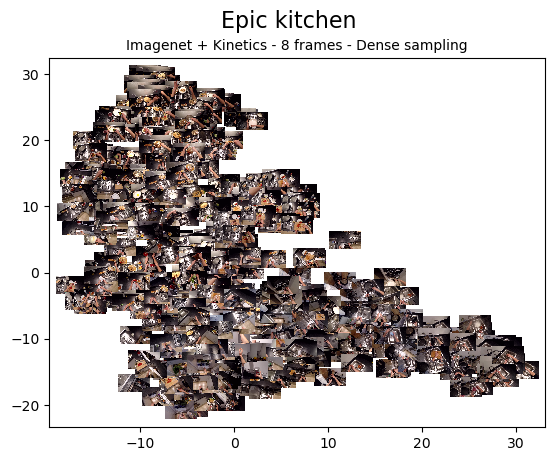

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


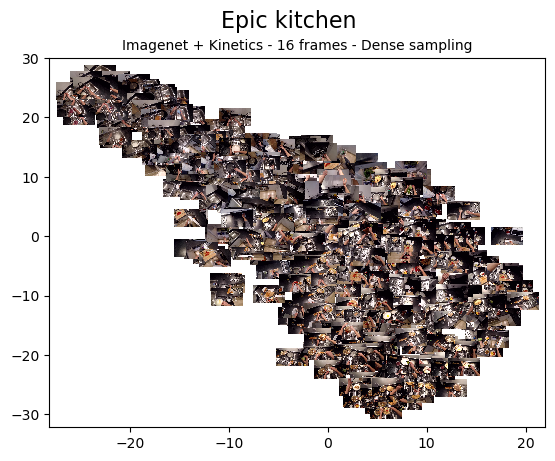

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


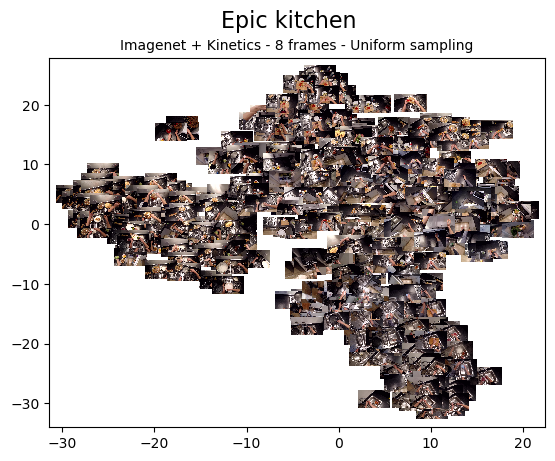

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


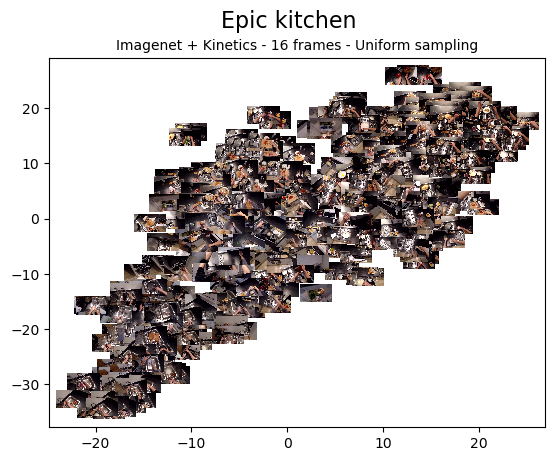

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


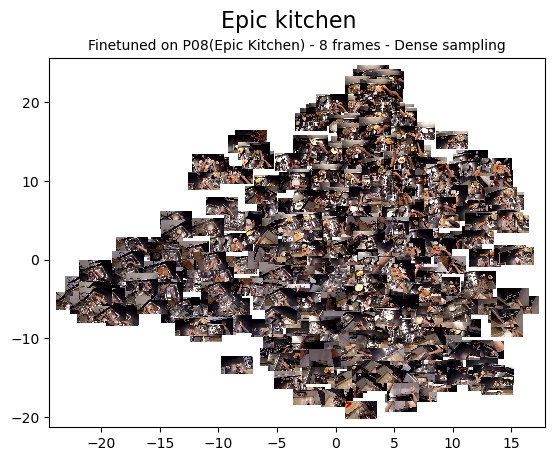

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


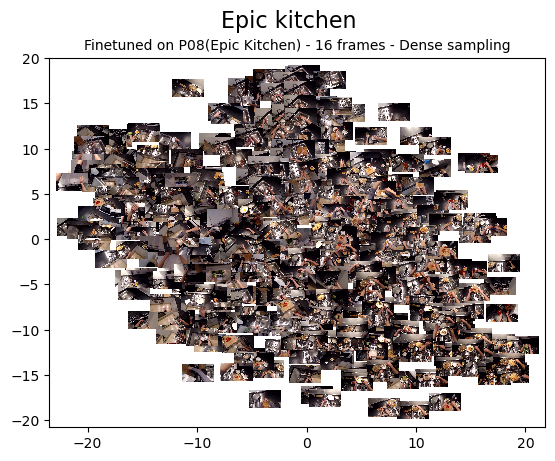

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


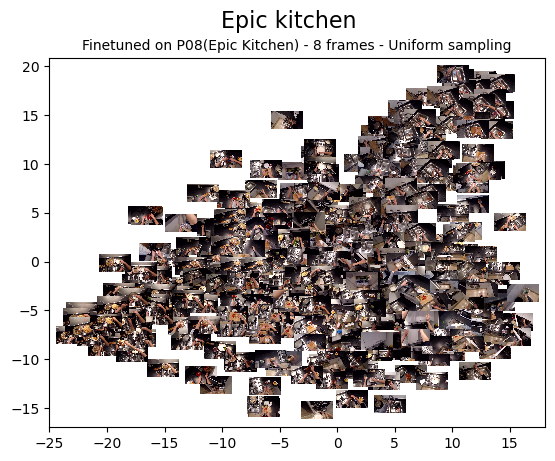

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


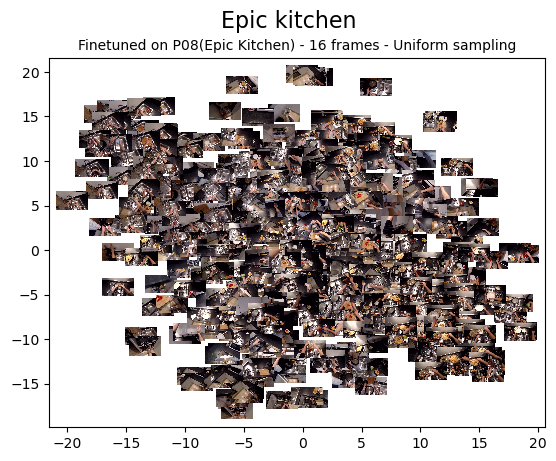

In [15]:
for pretrained in ["PT", "FT"]:
    for sampling in ["D", "U"]:
        for frames in [8, 16]:
            visualize_features_img("Epic kitchen", pretrained=pretrained, sampling=sampling, frames=frames)

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


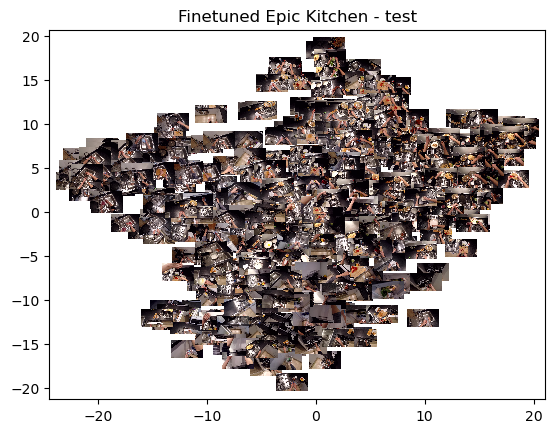

In [9]:
visualize_features_img("Finetuned Epic Kitchen - test")

In [4]:
import numpy as np

x = np.zeroes

ModuleNotFoundError: No module named 'numpy'

In [1]:

import pandas as pd

d = pd.read_pickle('./latent.pkl')

colors= ['green', 'red', 'yellow', 'grey', 'green', 'blu', 'black', 'purple']
for x, y, l in zip(d['x'], d['y'], d['labels']):
    print(colors[l])
    plt.scatter(x, y, c=colors, label=labels)    
    plt.legend()
    plt.savefig("./img_VAE.png")
    plt.show()


ModuleNotFoundError: No module named 'pandas'